In [1]:
'''
1.数据获取
2.数据基本处理
    2.1 截取部分数据
    2.2 把标签纸转换为数字
    2.3 分割数据(使⽤StratifiedShuffleSplit)
    2.4 数据标准化
    2.5 数据pca降维
3.模型训练
    3.1 基本模型训练
    3.2 模型调优
    3.2.1 调优参数:
        n_estimator,
        max_depth,
        min_child_weights,
        subsamples,
        consample_bytrees,
        etas
    3.2.2 确定最后最优参数
'''

'\n1.数据获取\n2.数据基本处理\n    2.1 截取部分数据\n    2.2 把标签纸转换为数字\n    2.3 分割数据(使⽤StratifiedShuffleSplit)\n    2.4 数据标准化\n    2.5 数据pca降维\n3.模型训练\n    3.1 基本模型训练\n    3.2 模型调优\n    3.2.1 调优参数:\n        n_estimator,\n        max_depth,\n        min_child_weights,\n        subsamples,\n        consample_bytrees,\n        etas\n    3.2.2 确定最后最优参数\n'

(17361, 42)
(12152, 42) (5209, 42)
(12152, 42) (5209, 42)


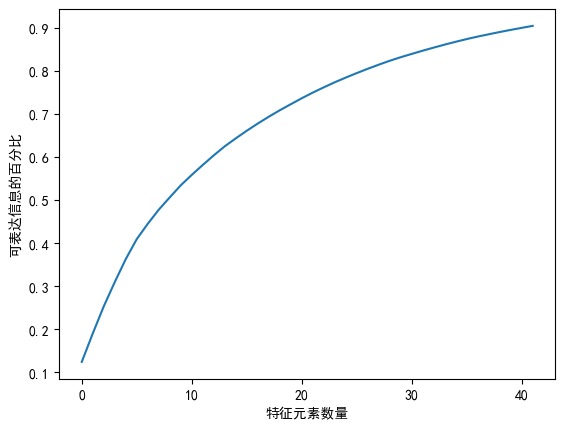

n_estimator: 100
测试数据的logloss值为:0.81093
n_estimator: 200
测试数据的logloss值为:0.74604
n_estimator: 400
测试数据的logloss值为:0.71336
n_estimator: 450
测试数据的logloss值为:0.71137
n_estimator: 500
测试数据的logloss值为:0.71078
n_estimator: 550
测试数据的logloss值为:0.71028
n_estimator: 600
测试数据的logloss值为:0.71132
n_estimator: 700
测试数据的logloss值为:0.71444
n_estimators的最优值为:550


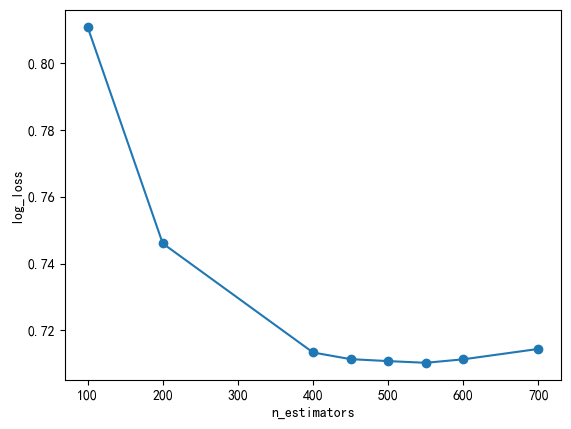

*********************************************************
max_depth: 1
测试数据的logloss值为:0.84087
max_depth: 3
测试数据的logloss值为:0.71028
max_depth: 5
测试数据的logloss值为:0.76558
max_depth: 6
测试数据的logloss值为:0.80784
max_depth: 7
测试数据的logloss值为:0.83960
max_depth的最优值为:3


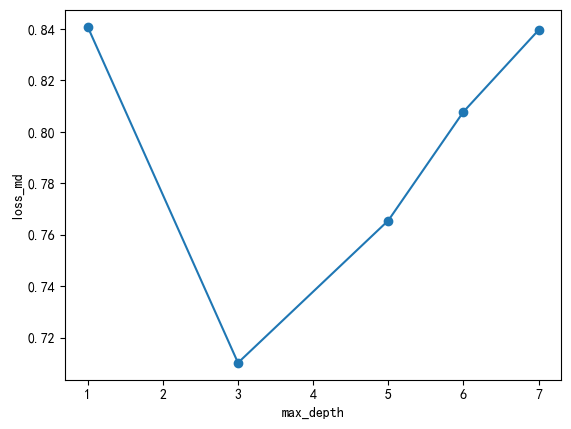

*********************************************************
min_child_weight: 1
测试数据的logloss值为:0.71028
min_child_weight: 3
测试数据的logloss值为:0.71359
min_child_weight: 5
测试数据的logloss值为:0.70988
min_child_weight: 7
测试数据的logloss值为:0.71198
min_child_weight: 9
测试数据的logloss值为:0.70929
min_child_weight的最优值为:9


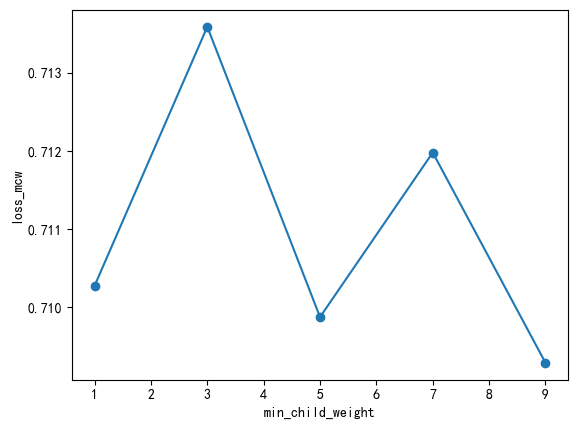

*********************************************************
subsample: 0.1
测试数据的logloss值为:0.77104
subsample: 0.3
测试数据的logloss值为:0.71358
subsample: 0.5
测试数据的logloss值为:0.70114
subsample: 0.7
测试数据的logloss值为:0.69781
subsample: 0.9
测试数据的logloss值为:0.70299
subsample的最优值为:0.7


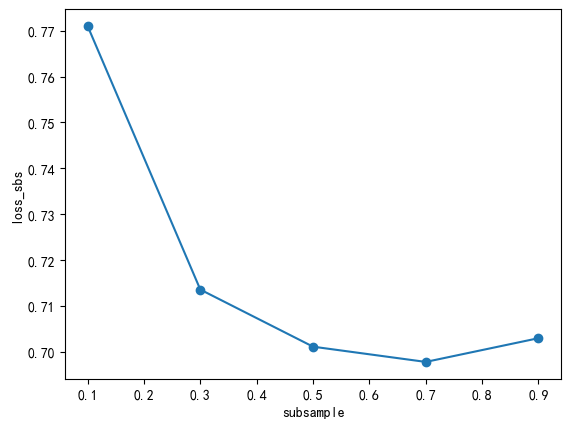

*********************************************************
colsample_bytree: 0.1
测试数据的logloss值为:0.72328
colsample_bytree: 0.3
测试数据的logloss值为:0.69856
colsample_bytree: 0.5
测试数据的logloss值为:0.69645
colsample_bytree: 0.7
测试数据的logloss值为:0.69622
colsample_bytree: 0.9
测试数据的logloss值为:0.69796
colsample_bytree的最优值为:0.7


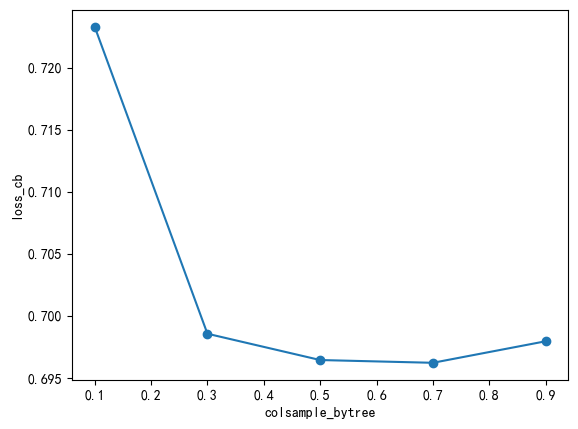

*********************************************************
learning_rate: 0.1
测试数据的logloss值为:0.69622
learning_rate: 0.3
测试数据的logloss值为:0.80150
learning_rate: 0.5
测试数据的logloss值为:0.89454
learning_rate: 0.7
测试数据的logloss值为:1.00502
learning_rate: 0.9
测试数据的logloss值为:1.10350
learning_rate的最优值为:0.1


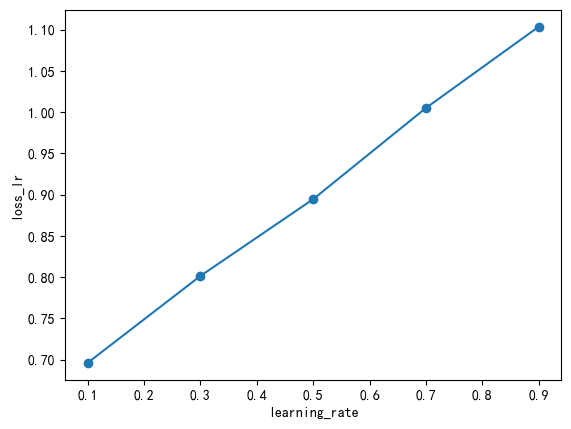

*********************************************************


"\nxgb = XGBClassifier(learning_rate =0.1, \n                    n_estimators=550, \n                    max_depth=3, \n                    min_child_weight=3, \n                    subsample=0.7, \n                    colsample_bytree=0.7, \n                    nthread=4, \n                    seed=42, \n                    objective='multi:softprob')\n"

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

# 1.数据获取
data = pd.read_csv("./data/otto/train.csv")

# 2.确定特征值和目标值
y = data["target"]
x = data.drop(["id","target"], axis=1)

rus = RandomUnderSampler(random_state=66)

x_resampled, y_resampled = rus.fit_resample(x, y)

# 3.将str标签转化为数字
le = LabelEncoder()

y_resampled = le.fit_transform(y_resampled)

# 数据PCA降维
pca = PCA(n_components=0.9)
x_train_pca = pca.fit_transform(x_resampled)

print(x_train_pca.shape)

# 4.分割数据
x_train, x_val, y_train, y_val = train_test_split(x_train_pca, y_resampled,train_size=0.7, random_state=66)

# 5.数据标准化
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

print(x_train_scaled.shape, x_val_scaled.shape)

# 数据PCA降维
#pca = PCA(n_components=0.9)
#x_train_pca = pca.fit_transform(x_train_scaled)
#x_val_pca = pca.fit_transform(x_val_scaled)

print(x_train_scaled.shape,x_val_scaled.shape) #从上⾯输出的数据可以看出,只选择65个元素,就可以表达出特征中90%的信息


# 降维数据可视化
# np.cumsum() 是 NumPy 的累计求和函数
# pca.explained_variance_ratio_ 是一个数组，表示每个主成分解释的数据总方差比例
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("特征元素数量")
plt.ylabel("可表达信息的百分比")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

plt.show()

# 6.模型训练
#xgb = XGBClassifier()
#xgb.fit(x_train_scaled,y_train)

# 改变预测值的输出模式,让输出结果为百分占⽐,降低logloss值
#y_pre_proba = xgb.predict_proba(x_val_scaled)
# 利用log_loss进行模型评估
#log_loss(y_val, y_pre_proba, normalize=True)

# xgb.get_params

# 7.模型调优
# n_estimator参数调优
loss_ne = []
n_estimators = [100,200,400,450,500,550,600,700]

for nes in n_estimators:
    print(f"n_estimator: {nes}")
    xgb = XGBClassifier(max_depth=3,
                        learning_rate=0.1,
                        n_estimators=nes,
                        objective="multi:sotfprob",# 多分类概率输出
                        n_jobs=-1,
                        nthread=4,
                        min_child_weight=1,
                        subsample=1,
                        colsample_bytree=1,
                        seed=66)
    xgb.fit(x_train_scaled,y_train)
    y_pre = xgb.predict_proba(x_val_scaled)
    loss = log_loss(y_val, y_pre)
    loss_ne.append(loss)
    print(f"测试数据的logloss值为:{loss:.5f}")

# 数据可视化
# "o" 表示每个数据点使用圆点标记。
# "-" 表示在数据点之间绘制折线。
plt.plot(n_estimators,loss_ne,"o-")
plt.xlabel("n_estimators")
plt.ylabel("log_loss")
print(f"n_estimators的最优值为:{n_estimators[np.argmin(loss_ne)]}")
plt.show()
print("*********************************************************")

# max_depth参数调优
loss_md = []
max_depth = [1,3,5,6,7]

for md in max_depth:
    print(f"max_depth: {md}")
    xgb = XGBClassifier(max_depth=md,
                        learning_rate=0.1,
                        n_estimators=n_estimators[np.argmin(loss_ne)],
                        objective="multi:sotfprob",# 多分类概率输出
                        n_jobs=-1,
                        nthread=4,
                        min_child_weight=1,
                        subsample=1,
                        colsample_bytree=1,
                        seed=66)
    xgb.fit(x_train_scaled,y_train)
    y_pre = xgb.predict_proba(x_val_scaled)
    loss = log_loss(y_val, y_pre)
    loss_md.append(loss)
    print(f"测试数据的logloss值为:{loss:.5f}")

# 数据可视化
# "o" 表示每个数据点使用圆点标记。
# "-" 表示在数据点之间绘制折线。
plt.plot(max_depth,loss_md,"o-")
plt.xlabel("max_depth")
plt.ylabel("loss_md")
print(f"max_depth的最优值为:{max_depth[np.argmin(loss_md)]}")
plt.show()
print("*********************************************************")

# min_child_weight参数调优
loss_mcw = []
min_child_weight = [1,3,5,7,9]

for mcw in min_child_weight:
    print(f"min_child_weight: {mcw}")
    xgb = XGBClassifier(max_depth=max_depth[np.argmin(loss_md)],
                        learning_rate=0.1,
                        n_estimators=n_estimators[np.argmin(loss_ne)],
                        objective="multi:sotfprob",# 多分类概率输出
                        n_jobs=-1,
                        nthread=4,
                        min_child_weight=mcw,
                        subsample=1,
                        colsample_bytree=1,
                        seed=66)
    xgb.fit(x_train_scaled,y_train)
    y_pre = xgb.predict_proba(x_val_scaled)
    loss = log_loss(y_val, y_pre)
    loss_mcw.append(loss)
    print(f"测试数据的logloss值为:{loss:.5f}")

# 数据可视化
# "o" 表示每个数据点使用圆点标记。
# "-" 表示在数据点之间绘制折线。
plt.plot(min_child_weight,loss_mcw,"o-")
plt.xlabel("min_child_weight")
plt.ylabel("loss_mcw")
print(f"min_child_weight的最优值为:{min_child_weight[np.argmin(loss_mcw)]}")
plt.show()
print("*********************************************************")


# subsample参数调优
loss_sbs = []
subsample = [0.1,0.3,0.5,0.7,0.9]

for sbs in subsample:
    print(f"subsample: {sbs}")
    xgb = XGBClassifier(max_depth=max_depth[np.argmin(loss_md)],
                        learning_rate=0.1,
                        n_estimators=n_estimators[np.argmin(loss_ne)],
                        objective="multi:sotfprob",# 多分类概率输出
                        n_jobs=-1,
                        nthread=4,
                        min_child_weight=min_child_weight[np.argmin(loss_mcw)],
                        subsample=sbs,
                        colsample_bytree=1,
                        seed=66)
    xgb.fit(x_train_scaled,y_train)
    y_pre = xgb.predict_proba(x_val_scaled)
    loss = log_loss(y_val, y_pre)
    loss_sbs.append(loss)
    print(f"测试数据的logloss值为:{loss:.5f}")

# 数据可视化
# "o" 表示每个数据点使用圆点标记。
# "-" 表示在数据点之间绘制折线。
plt.plot(subsample,loss_sbs,"o-")
plt.xlabel("subsample")
plt.ylabel("loss_sbs")
print(f"subsample的最优值为:{subsample[np.argmin(loss_sbs)]}")
plt.show()
print("*********************************************************")

# colsample_bytree参数调优
loss_cb = []
colsample_bytree = [0.1,0.3,0.5,0.7,0.9]

for cb in colsample_bytree:
    print(f"colsample_bytree: {cb}")
    xgb = XGBClassifier(max_depth=max_depth[np.argmin(loss_md)],
                        learning_rate=0.1,
                        n_estimators=n_estimators[np.argmin(loss_ne)],
                        objective="multi:sotfprob",# 多分类概率输出
                        n_jobs=-1,
                        nthread=4,
                        min_child_weight=min_child_weight[np.argmin(loss_mcw)],
                        subsample=subsample[np.argmin(loss_sbs)],
                        colsample_bytree=cb,
                        seed=66)
    xgb.fit(x_train_scaled,y_train)
    y_pre = xgb.predict_proba(x_val_scaled)
    loss = log_loss(y_val, y_pre)
    loss_cb.append(loss)
    print(f"测试数据的logloss值为:{loss:.5f}")

# 数据可视化
# "o" 表示每个数据点使用圆点标记。
# "-" 表示在数据点之间绘制折线。
plt.plot(colsample_bytree,loss_cb,"o-")
plt.xlabel("colsample_bytree")
plt.ylabel("loss_cb")
print(f"colsample_bytree的最优值为:{colsample_bytree[np.argmin(loss_cb)]}")
plt.show()
print("*********************************************************")


# learning_rate参数调优
loss_lr = []
learning_rate = [0.01,0.03,0.05,0.07,0.09]

for lr in learning_rate:
    print(f"learning_rate: {lr}")
    xgb = XGBClassifier(max_depth=max_depth[np.argmin(loss_md)],
                        learning_rate=lr,
                        n_estimators=n_estimators[np.argmin(loss_ne)],
                        objective="multi:sotfprob",# 多分类概率输出
                        n_jobs=-1,
                        nthread=4,
                        min_child_weight=min_child_weight[np.argmin(loss_mcw)],
                        subsample=subsample[np.argmin(loss_sbs)],
                        colsample_bytree=colsample_bytree[np.argmin(loss_cb)],
                        seed=66)
    xgb.fit(x_train_scaled,y_train)
    y_pre = xgb.predict_proba(x_val_scaled)
    loss = log_loss(y_val, y_pre)
    loss_lr.append(loss)
    print(f"测试数据的logloss值为:{loss:.5f}")

# 数据可视化
# "o" 表示每个数据点使用圆点标记。
# "-" 表示在数据点之间绘制折线。
plt.plot(learning_rate,loss_lr,"o-")
plt.xlabel("learning_rate")
plt.ylabel("loss_lr")
print(f"learning_rate的最优值为:{learning_rate[np.argmin(loss_lr)]}")
plt.show()
print("*********************************************************")

'''
xgb = XGBClassifier(learning_rate =0.1, 
                    n_estimators=550, 
                    max_depth=3, 
                    min_child_weight=3, 
                    subsample=0.7, 
                    colsample_bytree=0.7, 
                    nthread=4, 
                    seed=42, 
                    objective='multi:softprob')
'''

